In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Use the correct path (file will be in the same directory as the notebook if uploaded)
df = pd.read_csv("biwott.csv")

# Display the data
print(df)



      RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
0             1    15598695      Fields          619    France  Female   42   
1             2    15649354    Johnston          608     Spain  Female   41   
2             3    15737556    Vasilyev          502    France  Female   42   
3             4    15671610      Hooper          699    France  Female   39   
4             5    15625092     Colombo          850     Spain  Female   43   
...         ...         ...         ...          ...       ...     ...  ...   
9995       9996    15583480      Morgan          771    France    Male   39   
9996       9997    15620341     Nwebube          516    France    Male   35   
9997       9998    15613886    Trevisan          709    France  Female   36   
9998       9999    15792916  Ositadimma          772   Germany    Male   42   
9999      10000    15710408  Cunningham          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  

In [27]:
print(df.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [19]:
print(df.isnull())

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balance  NumOfProducts  HasCrCard  Is

In [21]:
print(df.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [29]:
print(df.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [41]:
print(df.head(10))

   RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
0          1    15598695      Fields          619    France  Female   42   
1          2    15649354    Johnston          608     Spain  Female   41   
2          3    15737556    Vasilyev          502    France  Female   42   
3          4    15671610      Hooper          699    France  Female   39   
4          5    15625092     Colombo          850     Spain  Female   43   
5          6    15741032        Tsao          645     Spain    Male   44   
6          7    15750014     Chikere          822    France    Male   50   
7          8    15784761     Ballard          376   Germany  Female   29   
8          9    15768359      Akhtar          501    France    Male   44   
9         10    15805769  O'Loughlin          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86           

In [45]:
print(df.tail(10))

      RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
9990       9991    15802857      Robson          714   Germany    Male   33   
9991       9992    15701175       Bruno          597    France  Female   53   
9992       9993    15783019       Price          726     Spain    Male   36   
9993       9994    15728912     Swanson          644    France    Male   28   
9994       9995    15585580       Chang          800    France  Female   29   
9995       9996    15583480      Morgan          771    France    Male   39   
9996       9997    15620341     Nwebube          516    France    Male   35   
9997       9998    15613886    Trevisan          709    France  Female   36   
9998       9999    15792916  Ositadimma          772   Germany    Male   42   
9999      10000    15710408  Cunningham          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9990       3   35016.60              1          1            

In [47]:
print(df.isnull())

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balance  NumOfProducts  HasCrCard  Is

In [55]:
print(df.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [60]:
print(df.notnull())

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender   Age  \
0          True        True     True         True       True    True  True   
1          True        True     True         True       True    True  True   
2          True        True     True         True       True    True  True   
3          True        True     True         True       True    True  True   
4          True        True     True         True       True    True  True   
...         ...         ...      ...          ...        ...     ...   ...   
9995       True        True     True         True       True    True  True   
9996       True        True     True         True       True    True  True   
9997       True        True     True         True       True    True  True   
9998       True        True     True         True       True    True  True   
9999       True        True     True         True       True    True  True   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember

In [83]:
print(df.isnull())

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balance  NumOfProducts  HasCrCard  Is

In [91]:
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [111]:
numerical_columns = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']]

# Calculate z-scores
z_scores = numerical_columns.apply(zscore)

# Identify outliers using Z-Score method
outliers_zscore = z_scores.abs() > 3
print("Outliers detected using Z-Score method:")
print(outliers_zscore.sum())

Outliers detected using Z-Score method:
CreditScore             8
Age                   133
Tenure                  0
Balance                 0
EstimatedSalary         0
Satisfaction Score      0
Point Earned            0
dtype: int64


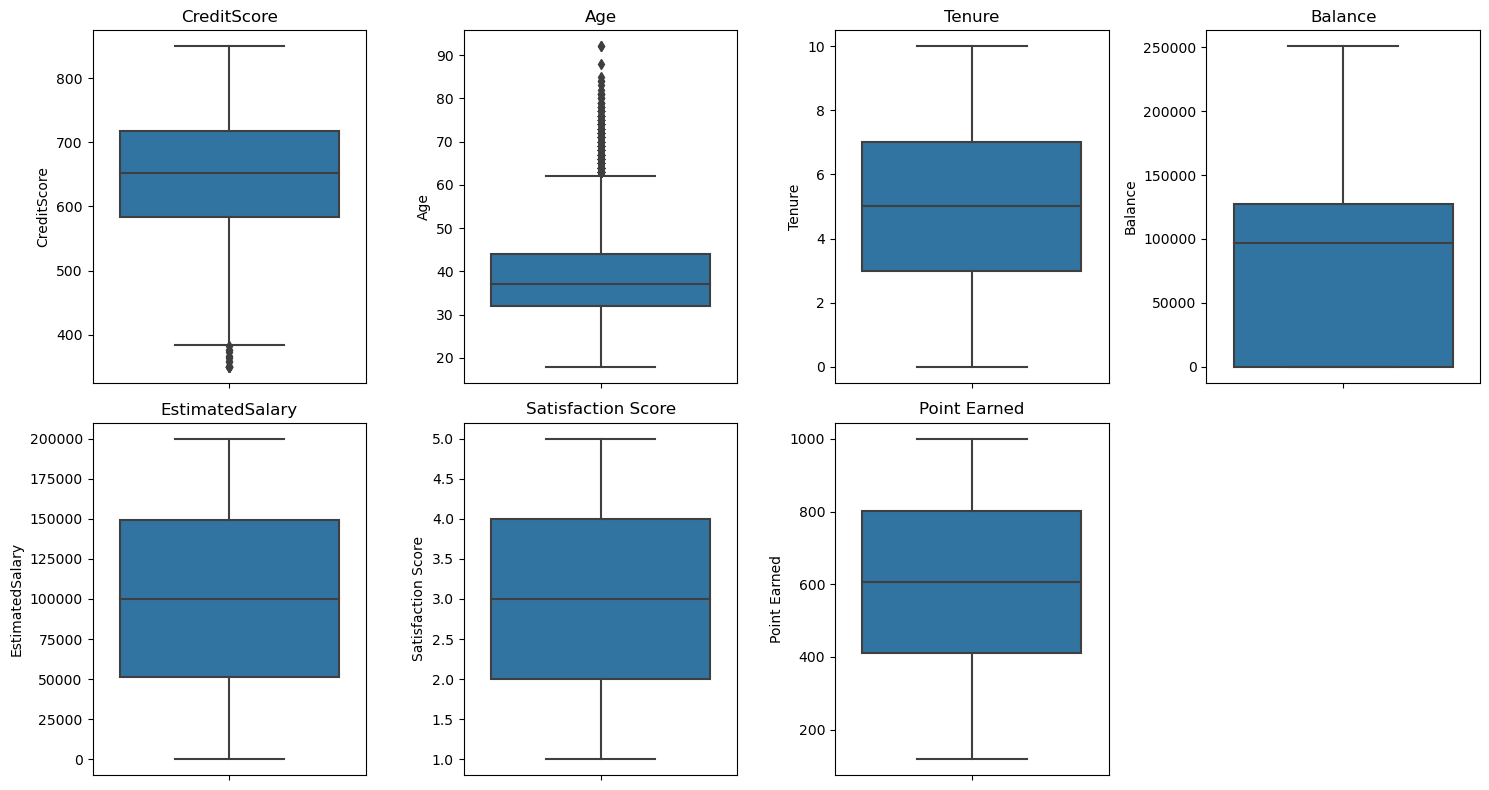

In [119]:
columns_with_outliers = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

# Check if all specified columns exist in the DataFrame
missing_columns = [col for col in columns_with_outliers if col not in df.columns]
if missing_columns:
    print(f"Warning: The following columns are missing from the DataFrame: {missing_columns}")
else:
    # Set the figure size for the plots
    plt.figure(figsize=(15, 8))
    
    # Create subplots for each column
    for i, column in enumerate(columns_with_outliers, 1):
        plt.subplot(2, 4, i)  # Create a subplot for each column
        sns.boxplot(y=df[column])  # Use y=df[column] to plot the boxplot
        plt.title(column)  # Set the title for each subplot

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plots